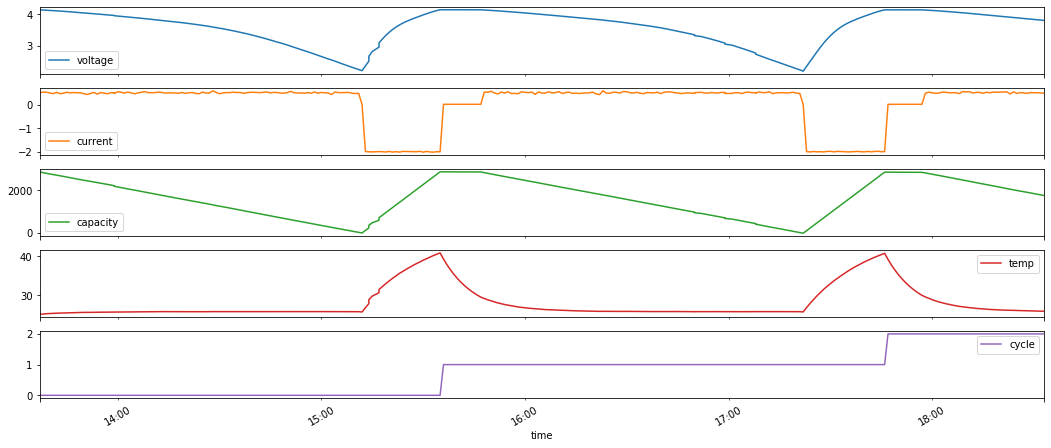

In [1]:
import pandas as pd
df=pd.read_csv('log1000.csv')
df.index=pd.to_datetime(df.time)
df=df.drop(['time'],axis=1)
df.index=df.index.to_period('1T')
a=df.head(300).plot(subplots=True,figsize=(18,8))

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 131779 entries, 2019-11-21 13:37 to 2020-02-20 07:43
Freq: T
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   voltage   131779 non-null  float64
 1   current   131779 non-null  float64
 2   capacity  131779 non-null  float64
 3   temp      131779 non-null  float64
 4   cycle     131779 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 MB


In [3]:
vi=df.iloc[0:200].loc[:,'voltage':'current'].to_numpy()
voltage=vi[:,0]
current=vi[:,1]

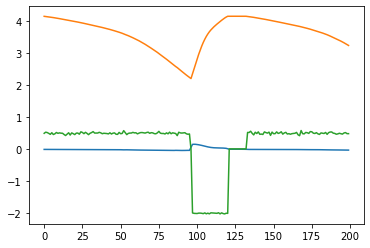

In [4]:
import numpy as np
dv=np.gradient(voltage)
from matplotlib import pyplot as plt
plt.plot(dv)
plt.plot(voltage)
plt.plot(current)

In [5]:
tc0=np.argmax(dv[:]>0) #time step to start charging
td0=np.argmax(dv[tc0:]<0) #time step to start discharging
tc1=np.argmax(dv[tc0+td0:]>0)
ti=tc0+td0
tf=tc0+td0+tc1
print(ti,tf)

122 122


In [6]:
tcutoff=ti+np.argmax(voltage[ti:]<3.0)
tcutoff

122

In [7]:
current[ti:tcutoff].sum()*1000*60/3600

0.0

In [8]:
def get_capacity(voltage,current,vcutoff=3.0,delta=60):
    dv=np.gradient(voltage)
    tc0=np.argmax(dv[:]>0) #time step to start charging
    td0=np.argmax(dv[tc0:]<0) #time step to start discharging
    tc1=np.argmax(dv[tc0+td0:]>0)
    ti=tc0+td0
    tf=tc0+td0+tc1
    tcutoff=ti+np.argmax(voltage[ti:]<vcutoff)
    return current[ti:tcutoff].sum()*1000*60/3600

In [166]:
vi=df.iloc[0:300].loc[:,'voltage':'current'].to_numpy()
voltage=vi[:,0]
current=vi[:,1]
get_capacity(voltage,current,vcutoff=3.0,delta=60)

617.4069582780764

In [178]:
data={
    "voltage":voltage.tolist(),
    "current":current.tolist()
}
print({"data": data})

{'data': {'voltage': [4.14274132531915, 4.136625842154154, 4.130208818884982, 4.123734829689651, 4.117347207361323, 4.109936708678143, 4.103060533910506, 4.0956084323881, 4.087253409970248, 4.079075458014474, 4.070451369605347, 4.0617983780819, 4.053013076097663, 4.044769319833811, 4.036999590413416, 4.028393025894573, 4.018853319103603, 4.010557379814208, 4.000916403812897, 3.991660815340178, 3.982886112464584, 3.9731833901779297, 3.963385030560513, 3.954217138347384, 3.943543322320657, 3.933196071238118, 3.9235440598649034, 3.912989394387341, 3.903006624881977, 3.8937695683697986, 3.8835845981311055, 3.872859872745055, 3.861362792287261, 3.8506728773638255, 3.8397814768260576, 3.8287415618154736, 3.817003723626296, 3.8053955531158086, 3.794182529181753, 3.782383971185476, 3.7703927506344015, 3.75822539450571, 3.746017244526361, 3.73257535393198, 3.7197395002083287, 3.705791597611547, 3.6911646262012026, 3.6773063145198983, 3.6631466237464045, 3.646560419526218, 3.630722858449437, 3.6

In [180]:
from requests import put, get, post
import json

In [181]:
post('http://localhost:5555/1', json={"data": data} ).json()

{'capacity': 617.4069582780764, 'last_update': '2020-04-05 13:56:56.490628'}

In [182]:
get('http://localhost:5555/1').json()

{'capacity': 617.4069582780764, 'last_update': '2020-04-05 13:56:56.490628'}

# Docker Build and Run
```sh
docker build -t battery_web:lastest .
docker run -d -p 5555:5000 battery_web:lastest
```

```

POST /1 HTTP/1.1
Host: localhost:5000
Content-Type: application/json
Cache-Control: no-cache

{"data": 
    {
        "voltage": [4.14274132531915, 4.136625842154154, 4.130208818884982, 4.123734829689651, 4.117347207361323, 4.109936708678143, 4.103060533910506, 4.0956084323881, 4.087253409970248, 4.079075458014474, 4.070451369605347, 4.0617983780819, 4.053013076097663, 4.044769319833811, 4.036999590413416, 4.028393025894573, 4.018853319103603, 4.010557379814208, 4.000916403812897, 3.991660815340178, 3.982886112464584, 3.9731833901779297, 3.963385030560513, 3.954217138347384, 3.943543322320657, 3.933196071238118, 3.9235440598649034, 3.912989394387341, 3.903006624881977, 3.8937695683697986, 3.8835845981311055, 3.872859872745055, 3.861362792287261, 3.8506728773638255, 3.8397814768260576, 3.8287415618154736, 3.817003723626296, 3.8053955531158086, 3.794182529181753, 3.782383971185476, 3.7703927506344015, 3.75822539450571, 3.746017244526361, 3.73257535393198, 3.7197395002083287, 3.705791597611547, 3.6911646262012026, 3.6773063145198983, 3.6631466237464045, 3.646560419526218, 3.630722858449437, 3.6140660379472256, 3.5937041238337217, 3.5748103066962202, 3.5576085844227965, 3.538348951166298, 3.5179747060814144, 3.4968829152418515, 3.4741324934626787, 3.451277518059756, 3.4275223746000973, 3.4046239658817914, 3.379874066327994, 3.3535119202479526, 3.326198175234879, 3.298613319671789, 3.270612674705231, 3.240843920254433, 3.2096306719175125, 3.1797899535186613, 3.147930054409968, 3.1157536666460897, 3.0844139563672943, 3.05274331084825, 3.0185726769029686, 2.9804806984981727, 2.9457293074893336, 2.911084880138794, 2.8758312534634847, 2.8413245586602014, 2.8038766228446947, 2.768220325662057, 2.728383327359193, 2.6918633750668284, 2.6529642806423133, 2.6146784992766627, 2.5770636290297766, 2.544402507116753, 2.5035573779728573, 2.4642924545275866, 2.4254879392744235, 2.386264783291965, 2.3468802179316555, 2.3102847514016123, 2.274980902555014, 2.239329182400203, 2.202490564135738, 2.352191821803129, 2.5061417228743634, 2.659985910329812, 2.8106567783041942, 2.9540427317032587, 3.0886599095994978, 3.2130463034649908, 3.326311063139918, 3.426106537401734, 3.5152310973226006, 3.5922043540817423, 3.659873125569941, 3.718098409820629, 3.7697976459022415, 3.816628091727402, 3.860031594454425, 3.9013539670886495, 3.940980365373388, 3.9804011157658783, 4.018193853491441, 4.054864571155516, 4.089188922415781, 4.1193260458920165, 4.1442203658857375, 4.145126795544821, 4.145017675355912, 4.144908382581039, 4.1447989174211415, 4.1446892800771895, 4.144579470750174, 4.144469489641123, 4.1443593369510765, 4.14424901288111, 4.1441385176323235, 4.144027851405832, 4.143917014402792, 4.137890319795436, 4.131447175362139, 4.1240616009817845, 4.117180583788357, 4.1107029797267565, 4.102714825626032, 4.0950580007576205, 4.086331643507806, 4.0785905630293335, 4.0705643194756025, 4.062574361161301, 4.053029944649719, 4.043703102603218, 4.034534500725682, 4.0246728524423485, 4.016593819380852, 4.006508798495621, 3.997293296337322, 3.98798608355635, 3.9775495287243365, 3.967976917102676, 3.958040327130997, 3.947347358908876, 3.9380495314892574, 3.927966032558558, 3.917448018945015, 3.907918967902073, 3.898078764564081, 3.8885277940166993, 3.878517727657, 3.8683015248540538, 3.857811128602932, 3.8466123570327015, 3.8368584779712887, 3.8275886575080538, 3.8145463712814887, 3.8034910839173657, 3.7923474246457887, 3.7798839880136295, 3.767285795082382, 3.7549112304334535, 3.7407074321307068, 3.7262317095946633, 3.712486440126642, 3.698564801098774, 3.6834418846029515, 3.6689495202968634, 3.6545268633649237, 3.6381297560162906, 3.621475901215184, 3.6045246356292697, 3.585802399013322, 3.5685659878329385, 3.5486830550206543, 3.5273483413832096, 3.505129530568039, 3.4836849340432785, 3.4618783402522637, 3.4405409495994976, 3.418016945292526, 3.393861450442015, 3.3695858888113523, 3.345312040340553, 3.3184987023709933, 3.2901622944261466, 3.262875395391533, 3.2349146756787963, 3.2047408611227004, 3.1749255263064122, 3.144358746509143, 3.1115150906444238, 3.0786513221772616, 3.0475770956415165, 3.0158149261551164, 2.981336334613077, 2.9465533682001355, 2.9136618655973328, 2.8763130898256417, 2.8380668025850206, 2.8013288584485956, 2.763480388854129, 2.727367836333761, 2.6870472405368497, 2.6484193725726204, 2.6098142529393367, 2.568079671893005, 2.532391759282651, 2.4942562782821422, 2.45572852682112, 2.4168797967799467, 2.3791391714960795, 2.3409471461711955, 2.3013577147221747, 2.2646997240651507, 2.229185910377581, 2.18643893379141, 2.336397181314664, 2.490881167877876, 2.644199687646203, 2.795352484262064, 2.939922284527794, 3.076690732188476, 3.20155473419718, 3.3145585490691927, 3.4167210483733212, 3.505826210240756, 3.583967916840604, 3.6523407893208932, 3.712139925924117, 3.764935925505808, 3.8123334103143485, 3.8558743407083065, 3.897420077405752, 3.9376299324127637, 3.9765725553175133, 4.01488586244185, 4.051474690460647, 4.0855712348819, 4.11641521547776, 4.142118877117892, 4.1430006389050815, 4.142886389270669, 4.142771972724699, 4.1426573894691066, 4.142542639705855, 4.142427723636908, 4.14231264146426, 4.142197393389906, 4.14208197961586, 4.141966400344153, 4.1418506557768255, 4.136114833219377, 4.129455866506568, 4.122801344044499, 4.116004210559634, 4.108874429441699, 4.1008453920814745, 4.092566698070542, 4.084387499222969, 4.075961557982781, 4.067334904729007, 4.059176967202506, 4.0493661836465815, 4.039606033981603, 4.0295657306037365, 4.020437289643551, 4.010725060931732, 4.0009003244114005, 3.9917661735263694, 3.98172417392662, 3.971999039448634, 3.961680084940928, 3.951475928468562, 3.9410987984515664, 3.9305453547244418, 3.919811374949476, 3.9107512848449715, 3.899853863048604, 3.8902230925622714, 3.8797376740929423, 3.8695318026642727, 3.8595312668563535, 3.848684832220223, 3.837896324036088, 3.8268474932273895, 3.8158961223101735, 3.804876645060536], 
        "current": [0.4954252831365967, 0.5307215130206101, 0.5191233657609267, 0.4935396019579267, 0.4633784734424288, 0.5139382966885976, 0.4582759574951052, 0.4799786469244079, 0.5209906533111716, 0.4953412632881488, 0.5093111926755846, 0.4997145372452887, 0.4976056584077666, 0.4593530480386464, 0.42718558418246017, 0.4675834291018952, 0.5123673088770667, 0.4412270518297617, 0.5084083764898957, 0.48426113770380996, 0.4560689734499003, 0.501238975714946, 0.5032036121567028, 0.4682881103580321, 0.5422154277266679, 0.5225354067666035, 0.4845715139830293, 0.5265126909740037, 0.4944455771368565, 0.4541377518687583, 0.4965916923082331, 0.5177035301358799, 0.548408912350589, 0.5031792092373898, 0.5053877898439777, 0.504201266814537, 0.5265509835075679, 0.5105353371887902, 0.4831005681254826, 0.4973110798017332, 0.4936021143242744, 0.4885119643677402, 0.4776173512225108, 0.5114447595520963, 0.4744505683656644, 0.5004510655693988, 0.508399975643565, 0.46671864111423106, 0.4624262837408176, 0.5239518385953479, 0.4833669577897762, 0.491526214069888, 0.5788748152474046, 0.5169783892391699, 0.4549825557101371, 0.4928879287024973, 0.5037558177753952, 0.5038125701428453, 0.5248511673513632, 0.5094132594927765, 0.5120806224405332, 0.478193129413739, 0.5012315856124653, 0.5175115806470743, 0.5199129305039186, 0.5097252263446824, 0.5030082731873994, 0.5202567590528555, 0.5308763960024363, 0.4947919714834818, 0.515769092800768, 0.5089689671495737, 0.4852605583305242, 0.4808305090138093, 0.5090019362010435, 0.5566168457264047, 0.4988855079350957, 0.4897637830480861, 0.491410540817611, 0.4749264076555576, 0.5093943257161317, 0.4799198897247616, 0.5311173926117435, 0.4829010452769817, 0.5108964523620116, 0.5000581809504984, 0.4892769811078722, 0.423719367831453, 0.5290906779668643, 0.5084904123893663, 0.5031300628028792, 0.5099085749507413, 0.514150479315936, 0.4803808244592988, 0.46650272481470795, 0.4748480341904577, 0.0, -1.9866156656751768, -1.9996481305322895, -2.000670599376652, -2.004645005966109, -1.9923170162491168, -1.9918865651458, -1.997023652808656, -2.0085768652386244, -1.9847395510542627, -2.013627144032459, -1.9934016353151676, -2.0145521971824385, -1.9831985497054212, -1.987533203513948, -1.9920500002560595, -1.9929751219739469, -1.998368105508594, -1.9798493675606397, -2.015994064773031, -1.9834199181670495, -2.005835240384409, -2.0170876883908893, -1.9952737456013547, -2.0003126114276064, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.5227468512811482, 0.5211117492230508, 0.5607188595061608, 0.4949015042135822, 0.4464246666791932, 0.5293126756303717, 0.4892191226928728, 0.5397735508201358, 0.465616882034529, 0.4717642483547211, 0.4601714570610817, 0.5392396817023519, 0.5176767194343155, 0.5013896644621284, 0.5322919293936439, 0.4314673720947259, 0.5336346905200338, 0.4834686440842208, 0.4847922759347552, 0.5399536149008297, 0.4922003299648217, 0.5080630199407539, 0.5436341802750715, 0.4701091691035646, 0.5070253420193296, 0.5255716132434382, 0.4729975543653403, 0.4849815432097556, 0.4670188579101695, 0.4851343302011544, 0.4900784129079681, 0.4973957636997657, 0.5238401929540171, 0.4497479195087818, 0.4214297101222666, 0.5824299059654102, 0.4835786118565441, 0.4776480819133759, 0.5222158285209428, 0.5147230199733287, 0.49259457669682105, 0.5495355365350485, 0.542763495937712, 0.4995182964050146, 0.4905918828115507, 0.5160086533001622, 0.4786029843831912, 0.4615309306438319, 0.5076797887090088, 0.4980679439514976, 0.4898551584267346, 0.5222426721350143, 0.4644965346509822, 0.5177542143019678, 0.5356044632869438, 0.5375678514875157, 0.5008268470291937, 0.4925869399102632, 0.4669588149675294, 0.4780509097302886, 0.4970385924764495, 0.4845185625134112, 0.4706764983147129, 0.5051875544643831, 0.5185015977019709, 0.4856445036894568, 0.4849307618962708, 0.5101221131243031, 0.4917787878887039, 0.4926137801772408, 0.5174297975471033, 0.5065556286275976, 0.4696165869301884, 0.4714646883528741, 0.5029045935899101, 0.4988786106581252, 0.4647035963008287, 0.5202383198561698, 0.5254525093309037, 0.4986230012823725, 0.5082423178989539, 0.4804764831612642, 0.5321198291977821, 0.5062403747411172, 0.5032127515931251, 0.5417459544970835, 0.4620349794866726, 0.4931247753664497, 0.498231448641829, 0.5031187838339378, 0.4901651179937263, 0.4981429052191586, 0.5194135048389414, 0.4844749334822338, 0.4733084808910319, 0.0, -1.9935980818156247, -2.0055456404954564, -1.9886302144958397, -2.001601214221587, -1.9954040885891144, -2.007189296127809, -1.9851521363639448, -1.9793028905726489, -2.003368222494982, -1.9820469656833797, -1.988703791771667, -1.9992939405558063, -2.0030498198334543, -2.0022748263972896, -1.9951417394723845, -1.983863650639432, -1.9984390917301682, -2.0017480170118667, -1.98480171146102, -2.00147102373957, -1.986651164969569, -1.9774577581469357, -1.9973230242105082, -1.9929876736535248, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.4791626633172522, 0.5223829590703408, 0.4935074924276266, 0.480633028453265, 0.4834783563577916, 0.5237415043801616, 0.5211716377106573, 0.4993984237793718, 0.501046602022618, 0.501158148287241, 0.4646374970207977, 0.5487049912423432, 0.5367040256142661, 0.544149801643445, 0.4888358374252729, 0.514883101630399, 0.5161795958274007, 0.476269033388253, 0.5200845281319837, 0.5005411535205401, 0.5280296745932073, 0.5192152025693506, 0.5250735626721043, 0.5308862069318674, 0.5365648509457466, 0.4500010864466881, 0.5374000535175487, 0.4710581702821738, 0.5082574943090701, 0.4896064165286109, 0.4743802029968517, 0.5079286294798415, 0.4978532735267483, 0.5016818202696984, 0.4885660917341419, 0.4824192057241939]
    }
}

```